In [1]:
from py_pol.jones_matrix import Jones_matrix, Jones_vector, degrees
from diffractio import degrees, mm, nm, um
from diffractio import np, plt
from matplotlib.patches import Rectangle
import os, time
from glob import glob
import imageio
from PIL import Image

In [31]:
def Fringe_Displacement_Simulation(N_phase = 2, N_angles = 9, azimuth_E1 = 90 * degrees, ellipticity_E1 = 0 * degrees, p1_E1 = 1, p2_E1 = 0, azimuth_E2 = 0 * degrees, ellipticity_E2 = 0 * degrees, p1_E2 = 1, p2_E2 = 0, R_ret = 90 * degrees, ellipticity_ret = 0 * degrees, azimuth_P = 45 * degrees, draw = False, filename = ""):
    ruta = os.getcwd()
    try:
        os.stat(ruta+"\Images")
    except:
        os.mkdir(ruta+"\Images")

    # Definición de ángulos y fases: 
    phase = np.linspace(0, N_phase * 360 * degrees, N_phase * 360 + 1)
    angles = np.linspace(0, 180 * degrees, N_angles, endpoint=False)
    
    if not 90 in angles/degrees: 
        print("Se ha cambiado N_angles por el valor de 10, para que pueda realizarse la gráfica correctamente")
        angles = np.linspace(0, 180 * degrees, 10, endpoint=False)
    else: 
        angles = np.linspace(0, 180 * degrees, N_angles, endpoint=False)
        
    if filename == "": 
            filename = "end"
            
    Angles, Phase = np.meshgrid(angles, phase)
    legend = np.round(angles / degrees, 1)         # leyenda para las gráficas


    # Polarizaciones de los brazos: 
    E0 = Jones_vector().linear_light(azimuth = 45 * degrees, intensity = 2)
    E1 = Jones_matrix().diattenuator_azimuth_ellipticity(p1 = p1_E1, p2 = p2_E1, azimuth = azimuth_E1, ellipticity = ellipticity_E1) * E0
    E2 = Jones_matrix().diattenuator_azimuth_ellipticity(p1 = p1_E2, p2 = p2_E2, azimuth = azimuth_E2, ellipticity = ellipticity_E2) * E0.add_global_phase(Phase)
    # Interferencia de los haces de intensidad:
    E = E1 + E2
    
    # Paso del haz final por el retardador y el polarizador: 
    Q = Jones_matrix().retarder_azimuth_ellipticity(R = R_ret, azimuth = Angles, ellipticity = ellipticity_ret)
    P = Jones_matrix().diattenuator_perfect(azimuth = azimuth_P)
    Efinal = P * Q * E
    
    # Representación gráfica: 
    if N_angles <= 24:
        I = Efinal.parameters.intensity()
        plt.figure(figsize=(12,6))
        for ind in range(N_angles):
            ls = "-" if ind <= N_angles/2 else "--"
            plt.plot(I[:,ind], linestyle=ls, linewidth=3)

        plt.legend(legend, loc=1)
    else:
        Efinal.parameters.azimuth_ellipticity(draw=True)
        I = Efinal.parameters.intensity(draw=True)
    
    os.chdir(ruta+"\Images")
    plt.title("Distribución de intensidad", fontsize = 25)
    plt.xlabel("X (px)", fontsize = 25)
    plt.ylabel("Intensidad (u.a.)", fontsize = 25)
    

    I0 = I[:,0]
    If = I[:,np.where(angles == 90*degrees)]
    x_min = np.array(np.where(I0 == np.min(I0)))[0][0]
    x_max = np.array(np.where(If == np.min(If)))[0][0]
    print(np.where(If == np.min(If)))
    print(x_max)
    plt.gca().add_patch(Rectangle((x_min,0),x_max-x_min,I0.max(), alpha=0.5))
    plt.savefig("Simulation_{}.jpg".format(filename))
    os.chdir(ruta)
    
    if draw == True:
        os.chdir(ruta+"\Images")
        for i in range (len(I[0,:])): 
            im_intensity = np.tile(I[:,i],(200,1))
            plt.figure()
            plt.imshow(im_intensity, cmap='gray')
            plt.axis('off')
            plt.clim(0,I0.max())
            plt.savefig("Simulation_{:03d}.png".format(i), bbox_inches='tight',pad_inches = 0)
            plt.close()      
        os.chdir(ruta) 
        os.chdir(ruta+"\Images")     
        filenames = sorted(list(glob("Simulation_*.png")))
        imgs = []
        for f in filenames:
            imgs.append(imageio.imread(f))
        imageio.mimsave("Simulation_{}.gif".format(filename), imgs, duration=0.5, subrectangles=True)
        # Eliminación archivos temporales
        for j in range(len(filenames)): 
            os.remove(filenames[j])       
        os.chdir(ruta) 
    return; 

In [2]:
def Fringe_Displacement_Simulation(N_phase = 2, N_angles = 9, azimuth_E1 = 90 * degrees, p1_E1 = 1, p2_E1 = 0, azimuth_E2 = 0 * degrees, p1_E2 = 1, p2_E2 = 0, R_ret = 90 * degrees, ellipticity_ret = 0 * degrees, azimuth_P = 45 * degrees, draw = False, filename = ""):
    ruta = os.getcwd()
    try:
        os.stat(ruta+"\Images")
    except:
        os.mkdir(ruta+"\Images")
    
    
    # Definición de ángulos y fases: 
    phase = np.linspace(0, N_phase * 360 * degrees, N_phase * 360 + 1)
    angles = np.linspace(0, 180 * degrees, N_angles, endpoint=False)
    
    if not 90 in angles/degrees: 
        print("Se ha cambiado N_angles por el valor de 10, para que pueda realizarse la gráfica correctamente")
        angles = np.linspace(0, 180 * degrees, 10, endpoint=False)
    else: 
        angles = np.linspace(0, 180 * degrees, N_angles, endpoint=False)
        
    if filename == "": 
            filename = "end"
            
    Angles, Phase = np.meshgrid(angles, phase)
    legend = np.round(angles / degrees, 1)         # leyenda para las gráficas


    # Polarizaciones de los brazos: 
    E0 = Jones_vector().circular_light(intensity = 2)
    E1 = Jones_matrix().diattenuator_linear(p1 = p1_E1, p2 = p2_E1, azimuth = azimuth_E1) * E0
    E2 = Jones_matrix().diattenuator_linear(p1 = p1_E2, p2 = p2_E2, azimuth = azimuth_E2) * E0.add_global_phase(Phase)
    # Interferencia de los haces de intensidad:
    E = E1 + E2
    
    # Paso del haz final por el retardador y el polarizador: 
    Q = Jones_matrix().retarder_azimuth_ellipticity(R = R_ret, azimuth = Angles, ellipticity = ellipticity_ret)
    P = Jones_matrix().diattenuator_perfect(azimuth = azimuth_P)
    Efinal = P * Q * E
    
    # Representación gráfica: 
    if N_angles <= 120:
        I = Efinal.parameters.intensity()
        plt.figure(figsize=(12,6)).add_subplot(projection='3d')
        for ind in range(N_angles-1):
            ls = "-" if ind <= N_angles/2 else "--"
            plt.plot(phase, I[:,ind], zs=angles[ind], zdir = "y", linestyle=ls, linewidth=3, label = "H" if ind == 1 or ind == 5 else "J")

        plt.legend(loc=1)
    else:
        Efinal.parameters.azimuth_ellipticity(draw=True)
        I = Efinal.parameters.intensity(draw=True)
    
    os.chdir(ruta+"\Images")
    plt.title("Distribución de intensidad", fontsize = 25)
    plt.xlabel("X (px)", fontsize = 25)
    plt.ylabel("Intensidad (u.a.)", fontsize = 25)
    

    I0 = I[:,0]
    If = I[:,np.where(angles == 90*degrees)]
    x_min = np.array(np.where(I0 == np.min(I0)))[0][0]
    x_max = np.array(np.where(If == np.min(If)))[0][0]
    # plt.gca().add_patch(Rectangle((360,0),x_max-x_min,2.5, alpha=0.5))
    # plt.savefig("Simulation_{}.jpg".format(filename))
    os.chdir(ruta)
    
    if draw == True:
        os.chdir(ruta+"\Images")
        for i in range (len(I[0,:])): 
            im_intensity = np.tile(I[:,i],(200,1))
            plt.figure()
            plt.imshow(im_intensity, cmap='gray')
            plt.axis('off')
            plt.clim(0,I0.max())
            plt.savefig("Simulation_{:03d}.png".format(i), bbox_inches='tight',pad_inches = 0)
            plt.close()      
        os.chdir(ruta) 
        os.chdir(ruta+"\Images")     
        filenames = sorted(list(glob("Simulation_*.png")))
        imgs = []
        for f in filenames:
            imgs.append(imageio.imread(f))
        imageio.mimsave("Simulation_{}.gif".format(filename), imgs, duration=0.5, subrectangles=True)
        # Eliminación archivos temporales
        for j in range(len(filenames)): 
            os.remove(filenames[j])       
        os.chdir(ruta) 
    return; 




In [29]:
dicc_prueba = {}
dicc_prueba["N_phase"] = 2
dicc_prueba["N_angles"] = 10
dicc_prueba["azimuth_E1"] = 90 * degrees
dicc_prueba["p1_E1"] = 1
dicc_prueba["p2_E1"] = 0
dicc_prueba["azimuth_E2"] = 0 * degrees
dicc_prueba["p1_E2"] = 1
dicc_prueba["p2_E2"] = 0
dicc_prueba["R_ret"] = 80 * degrees
dicc_prueba["ellipticity_ret"] = 0 * degrees
dicc_prueba["azimuth_P"] = 45 * degrees
dicc_prueba["draw"] = True
dicc_prueba["filename"] = "end"


(array([620], dtype=int64), array([0], dtype=int64), array([0], dtype=int64))
620


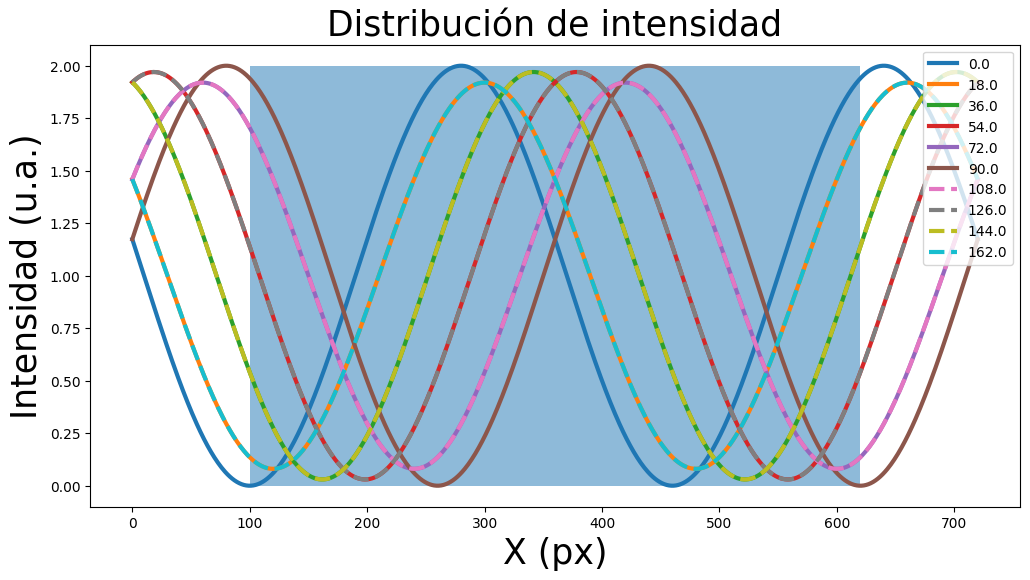

In [33]:
Fringe_Displacement_Simulation(**dicc_prueba)

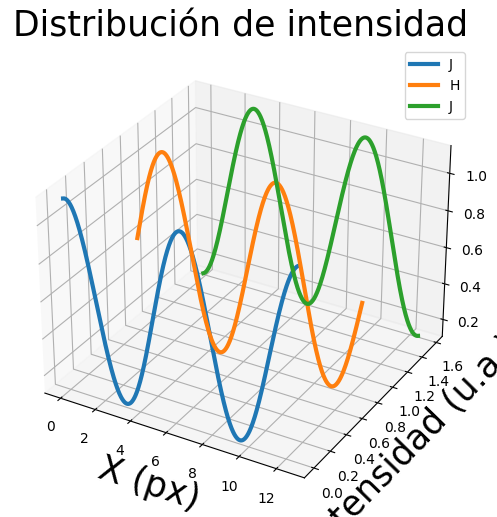

In [44]:
Fringe_Displacement_Simulation(N_phase = 2, N_angles = 4, azimuth_E1 = 90 * degrees, p1_E1 = 1, p2_E1 = 0, azimuth_E2 = 0 * degrees, p1_E2 = 0.5, p2_E2 = 0, R_ret = 85 * degrees, ellipticity_ret = 0 * degrees, azimuth_P = 45 * degrees, draw = True, filename = "end2")

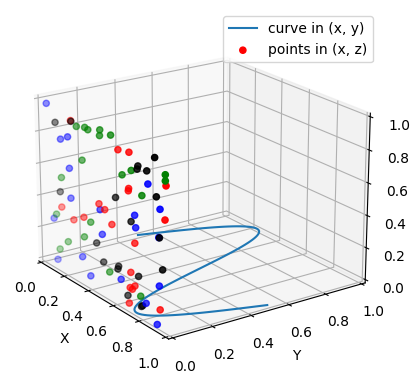

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()